# Uniform - Point Data 생성 원본

In [1]:
import random 

num= int(input())
f = open("sample_data.txt", 'w')
for i in range(0,num): 
    x=random.uniform(125.06666668,131.87222221)
    y=random.uniform(33.11000000,38.44000000)
    f.write("p %f %f\n"%(x,y))

f.close()


10000


# Uniform - Polygon 생성 - MBR의 한 변의 길이를 Comp의 한변의 길이보다 작게

* Polygon을 감싸는 MBR을 기준으로 sLSM-BPT를 빌드한다 (교수님 말씀)

* 따라서 MBR (SW NW SE NE)를 만들어주자

* 이때 MBR 한 변의 길이를 전체 범위를 64분할 했을 때(level 3기준) 한 Component의 한 변의 길이보다 작게 랜덤으로 해서 만들어준다
  - 그래야 overlap 계산할 때 편함 (mbr 한 변이 최대 2개 component와 오버랩됨)
  - 그리고 MBR은 정사각형이 아니도록 다르게 랜덤값 부여

* 그리고 sw 생성 시 max_x와 max_y값을 (기존 최대 길이 - Comp 한 변 길이)로 해줘야함 -> ne 계산 시 out of range
  - 어쩔수 없어 방법이 없음
  
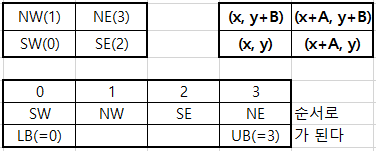

* 그리고 sw 생성 시 max_x와 max_y값을 (기존 최대 길이 - Comp 한 변 길이)로 해줘야함 -> ne 계산 시 out of range
* 얘 때문에 나눠서 생성하자 (번갈아가면서 생성되도록)
  - 생성 범위를 왼쪽 아래 => 오른쪽 위 대각선으로 올라가면서 형성
  - 생성 범위를 왼쪽 아래 <= 오른쪽 위 대각선으로 내려가면서 형성


### SW NW SE NE 전부 생성 ver

In [26]:
import random 

num= int(input())
f = open("sample_data.txt", 'w')

num /= 2

for i in range(0,int(num)): 
    ### 생성 범위를 왼쪽 아래 => 오른쪽 위 대각선으로 올라가면서 형성 ###
    # Compute Random dist_x dist_y (= 64분할된 Component의 한 변보다 작게)
    dist_x=random.uniform(0, 0.850694)
    dist_y=random.uniform(0, 0.666249)
    
    
    # Create SW = LB = [0] = 기준점 (x, y)
    sw_x=random.uniform(125.06666668,131.87222221 - 0.850694)
    sw_y=random.uniform(33.11000000,38.44000000 - 0.666249)
    
    # Create NW = [1] =  (x, y + B) 
    nw_x=sw_x
    nw_y=sw_y + dist_y
    
    # Create SE = [2] =  (x + A, y) 
    se_x=sw_x + dist_x
    se_y=sw_y
    
    # Create SE = [3] =  (x + A, y + B) 
    ne_x=sw_x + dist_x
    ne_y=sw_y + dist_y
    
    f.write("p %f %f, %f %f, %f %f, %f %f\n"%(sw_x, sw_y, nw_x, nw_y, se_x, se_y, ne_x, ne_y))
    
    
    ### 생성 범위를 왼쪽 아래 => 오른쪽 위 대각선으로 올라가면서 형성 ###
    # Compute Random dist_x dist_y (= 64분할된 Component의 한 변보다 작게)
    dist_x=random.uniform(0, 0.850694)
    dist_y=random.uniform(0, 0.666249)
    
    
    # Create SW = LB = [3] = 기준점 (x, y)
    ne_x=random.uniform(125.06666668 + 0.850694,131.87222221)
    ne_y=random.uniform(33.11000000 + 0.666249,38.44000000)
    
    # Create SE = [2] =  (x, y - B) 
    se_x=ne_x
    se_y=ne_y - dist_y
    
    # Create NW = [1] =  (x - A, y) 
    nw_x=ne_x - dist_x
    nw_y=ne_y
        
    # Create SW = [0] =  (x - A, y - B) 
    sw_x=ne_x - dist_x
    sw_y=ne_y - dist_y
    
    f.write("p %f %f, %f %f, %f %f, %f %f\n"%(sw_x, sw_y, nw_x, nw_y, se_x, se_y, ne_x, ne_y))
    
    
    

f.close()


500000


### SW NE만 생성 ver

In [31]:
import random 

num= int(input())
f = open("sample_data.txt", 'w')

num /= 2

for i in range(0,int(num)): 
    ### 생성 범위를 왼쪽 아래 => 오른쪽 위 대각선으로 올라가면서 형성 ###
    # Compute Random dist_x dist_y (= 64분할된 Component의 한 변보다 작게)
    dist_x=random.uniform(0, 0.850694)
    dist_y=random.uniform(0, 0.666249)
    
    
    # Create SW = LB = [0] = 기준점 (x, y)
    sw_x=random.uniform(125.06666668,131.87222221 - 0.850694)
    sw_y=random.uniform(33.11000000,38.44000000 - 0.666249)
    
    # Create SE = [3] =  (x + A, y + B) 
    ne_x=sw_x + dist_x
    ne_y=sw_y + dist_y
    
    f.write("p %f %f, %f %f\n"%(sw_x, sw_y, ne_x, ne_y))
    
    
    ### 생성 범위를 왼쪽 아래 => 오른쪽 위 대각선으로 올라가면서 형성 ###
    # Compute Random dist_x dist_y (= 64분할된 Component의 한 변보다 작게)
    dist_x=random.uniform(0, 0.850694)
    dist_y=random.uniform(0, 0.666249)
    
    
    # Create SW = LB = [3] = 기준점 (x, y)
    ne_x=random.uniform(125.06666668 + 0.850694,131.87222221)
    ne_y=random.uniform(33.11000000 + 0.666249,38.44000000)
            
    # Create SW = [0] =  (x - A, y - B) 
    sw_x=ne_x - dist_x
    sw_y=ne_y - dist_y
    
    f.write("p %f %f, %f %f\n"%(sw_x, sw_y, ne_x, ne_y))
        

f.close()


500000


In [27]:
131.87222221 - 0.850694

131.02152820999999

In [29]:
# x축 총 길이
total_x = 131.87222221 - 125.06666668
print(total_x)

# 64분할 시 한 Component의 x길이 = 0.850694   -> x축엔 이거보다 작은 랜덤값을 생성해서 더해주고
print(total_x / 8)
print()

# y축 총 길이
total_y = 38.44000000 - 33.11000000
print(total_y)

# 64분할 시 한 Component의 y길이 = 0.666249   -> y축엔 이거보다 작은 랜덤값을 생성해서 더해주고
print(total_y / 8)
print()

# 대각선 총 길이
import math
print(math.sqrt(total_x**2 + total_y**2))

6.805555529999992
0.850694441249999

5.329999999999998
0.6662499999999998

8.644332598408825


In [13]:
pow(4, 3)

64

# Uniform - Polygon 생성 - MBR의 한 변의 길이를 Comp의 한변의 길이보다 작게